# 案例1：学生成绩统计

In [10]:
import numpy as np
import pandas as pd

# 导入matplotlib库中的额pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
# 让图表直接在Jupyter notebook中展示出来
%matplotlib inline

# 一个cell输出多行语句
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# # pyecharts
# from pyecharts.charts import Bar
# from pyecharts import options as opts
# # 内置主题类型可查看 pyecharts.globals.ThemeType
# from pyecharts.globals import ThemeType

plt.style.use('seaborn-whitegrid')
sns.set_style("white")
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (8, 6),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          # 解决负号无法正常显示的问题
          'axes.unicode_minus': False,
          # 解决中文乱码问题
          'font.sans-serif': ['SimHei']}
plt.rcParams.update(params)
# 默认设置下matplotlib做出来的图标不是很清晰，可以将图表设置成矢量格式显示
%config InlineBackend.figure_format = 'svg'

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.1.1
0.9.0


In [11]:
df = pd.read_excel('data/student_score.xlsx')
df

# 找出语文不及格的人
df[df['语文'] < 60]

# 计算每个人的总分
df['总分'] = df['语文'] + df['数学'] + df['英语']

df

//anaconda3/lib/python3.7/site-packages/xlrd/xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


,姓名,年龄,性别,语文,数学,英语
0,张三,15,男,78,87,68
1,李四,20,女,102,65,86
2,王五,28,男,96,89,120
3,赵六,18,女,54,101,34
4,孙七,14,男,32,78,98


,姓名,年龄,性别,语文,数学,英语
3,赵六,18,女,54,101,34
4,孙七,14,男,32,78,98


,姓名,年龄,性别,语文,数学,英语,总分
0,张三,15,男,78,87,68,233
1,李四,20,女,102,65,86,253
2,王五,28,男,96,89,120,305
3,赵六,18,女,54,101,34,189
4,孙七,14,男,32,78,98,208


,语文,数学,英语,总分
姓名,,,,
张三,78,87,68,233
李四,102,65,86,253
王五,96,89,120,305
赵六,54,101,34,189
孙七,32,78,98,208


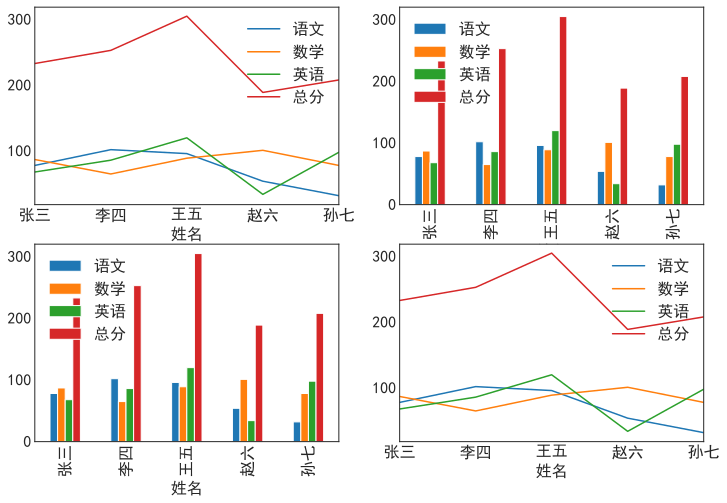

In [12]:
# 索引为姓名
df.index = df['姓名']
# 过滤掉姓名列、年龄列
df = df[['语文', '数学', '英语', '总分']]
df
# 创建一个画布，fig表示画布，ax表示子图
fig, ax = plt.subplots(2, 2, figsize=(12, 8)) # 创建2行2列的子图，是二维的
# 绘图在第一个子图ax[0]上
df.plot(ax=ax[0, 0])
# 绘图在第二个子图ax[1]上
df.plot.bar(ax=ax[0, 1])
# 等价于
df.plot(ax=ax[1, 0], kind='bar')
df.plot(ax=ax[1, 1], kind='line')